- gen the codes for masks from the other code from before tomorrow

In [8]:
import os 
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [9]:
tdem_fn = "/media/ljp238/12TBWolf/BRCHIEVE/TILES12/N10E105/N10E105_tdem_dem_egm.tif"

In [40]:

def calculate_iqr_thresholds(dem_data, k=1.5, hval=80,lval=10):
    # Flatten the data and remove NaN values
    flat_data = dem_data[~np.isnan(dem_data)]
    
    # Calculate Q1, Q3, and IQR
    q1 = np.nanpercentile(flat_data, lval)
    q3 = np.nanpercentile(flat_data, hval)
    iqr = q3 - q1
    
    # Calculate lower and upper bounds
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    return lower_bound, upper_bound

def calculate_zscore_thresholds(dem_data, z_threshold=3):
    # Flatten the data and remove NaN values
    flat_data = dem_data[~np.isnan(dem_data)]
    
    # Calculate mean and standard deviation
    mean = np.mean(flat_data)
    std = np.std(flat_data)
    
    # Calculate lower and upper bounds
    lower_bound = mean - z_threshold * std
    upper_bound = mean + z_threshold * std
    
    return lower_bound, upper_bound


def apply_statistical_thresholds(dem_data, method='iqr', **kwargs):
    if method == 'iqr':
        lower_bound, upper_bound = calculate_iqr_thresholds(dem_data, **kwargs)
    elif method == 'zscore':
        lower_bound, upper_bound = calculate_zscore_thresholds(dem_data, **kwargs)
    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'zscore'.")
    
    # Apply thresholds
    dem_data = dem_data.copy()
    dem_data[(dem_data < lower_bound) | (dem_data > upper_bound)] = np.nan
    return dem_data

def read_dem(dem_path):
    with rasterio.open(dem_path) as src:
        dem_data = src.read(1)
        nodata_value = src.nodata
    if nodata_value is not None:
        dem_data = dem_data.astype("float32")
        dem_data[dem_data == nodata_value] = np.nan
    return dem_data


def get_null_mask(dem_data):
    return np.isnan(dem_data)

def apply_thresholds(dem_data, lval=-30, hval=1000):
    dem_data = dem_data.copy()
    dem_data[(dem_data <= lval) | (dem_data >= hval)] = np.nan
    return dem_data

def plot_dem_and_mask(dem_data, null_mask):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot DEM
    im1 = axes[0].imshow(dem_data, cmap='terrain', vmin=np.nanmin(dem_data), vmax=np.nanmax(dem_data))
    axes[0].set_title("DEM")
    fig.colorbar(im1, ax=axes[0], orientation='vertical')
    
    # Plot Null Mask
    im2 = axes[1].imshow(null_mask, cmap='binary', vmin=0, vmax=1)
    axes[1].set_title("Null Mask")
    
    plt.tight_layout()
    plt.show()

In [41]:
dem_data = read_dem(tdem_fn)

In [79]:
k = 1.5
hval=85
lval=2
lower_bound, upper_bound = calculate_iqr_thresholds(dem_data, k,hval,lval)
print(f"IQR Bounds: Lower={lower_bound}, Upper={upper_bound}")

IQR Bounds: Lower=-24.31850552558899, Upper=22.38279414176941


In [46]:
# Apply IQR thresholds
dem_cleaned_iqr = apply_statistical_thresholds(dem_data, method='iqr',k=k,hval=hval,lval=lval)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_dem_and_mask(dem_data, null_mask):
    # Define a custom colormap for the mask: blue for valid data, red for no-data
    mask_cmap = ListedColormap(['blue', 'red'])
    
    # Calculate vmin and vmax based on the 5th and 85th percentiles (ignoring NaNs)
    flat_data = dem_data[~np.isnan(dem_data)]
    vmin = np.percentile(flat_data, 5)
    vmax = np.percentile(flat_data, 85)
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot DEM
    im1 = axes[0].imshow(
        dem_data,
        cmap='terrain',
        vmin=vmin,
        vmax=vmax
    )
    # Set values below zero to black
    im1.cmap.set_under('black')
    
    axes[0].set_title("DEM (Terrain)")
    fig.colorbar(im1, ax=axes[0], orientation='vertical', extend='both')
    
    # Plot Null Mask
    im2 = axes[1].imshow(
        null_mask,
        cmap=mask_cmap,
        vmin=0,
        vmax=1
    )
    axes[1].set_title("Null Mask (Blue=Data, Red=No Data)")
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

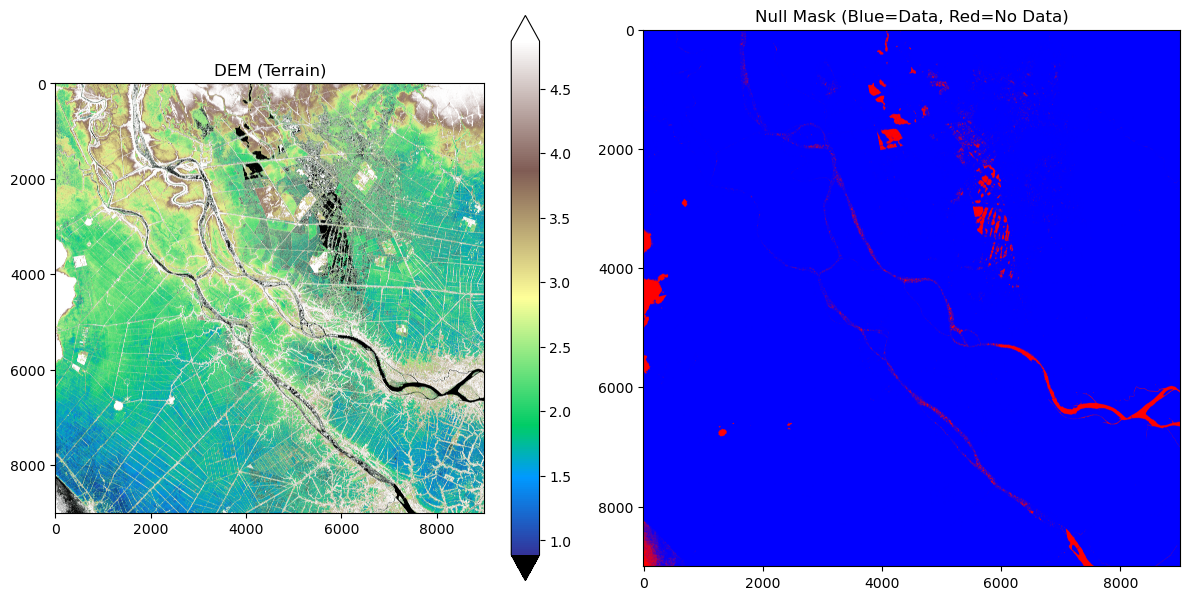

In [49]:
plot_dem_and_mask(dem_data, get_null_mask(dem_cleaned_iqr))

In [50]:
# read and plot all the other hem, com, wam, wbm,esa water 

In [72]:
hem_fn = "/media/ljp238/12TBWolf/BRCHIEVE/TILES12/N10E105/N10E105_tdem_hem.tif"
wam_fn = "/media/ljp238/12TBWolf/BRCHIEVE/TILES12/N10E105/N10E105_tdem_wam.tif"
com_fn = "/media/ljp238/12TBWolf/BRCHIEVE/TILES12/N10E105/N10E105_tdem_com.tif"
lcm_fn = "/media/ljp238/12TBWolf/BRCHIEVE/TILES12/N10E105/N10E105_edem_lcm.tif"
wbm_fn = "/media/ljp238/12TBWolf/BRCHIEVE/TILES12/N10E105/N10E105_cdem_wbm.tif"
esa_fn = "/media/ljp238/12TBWolf/BRCHIEVE/TILES12/N10E105/N10E105_esawc.tif"

In [ ]:
def rload(dem_path):
    with rasterio.open(dem_path) as src:
        rdata = src.read()
    print(rdata.shape)
    return rdata

def read_dem(dem_path):
    with rasterio.open(dem_path) as src:
        dem_data = src.read(1)
        nodata_value = src.nodata
    if nodata_value is not None:
        dem_data = dem_data.astype("float32")
        dem_data[dem_data == nodata_value] = np.nan
        dem_data[dem_data <= -30] = np.nan
    return dem_data

def get_null_mask(dem_data):
    return np.isnan(dem_data)

def print_unique_values(array, verbose=False):
    # Flatten the array to handle multi-dimensional arrays
    flat_array = array.flatten()
    
    # Get unique values and their counts
    unique_values, counts = np.unique(flat_array, return_counts=True)
    
    # Print the total number of unique values
    print(f"Total Unique Values: {len(unique_values)}")
    print(unique_values)
    
    # Print each unique value and its count
    if verbose:
        print("Unique Values and Counts:")
        for value, count in zip(unique_values, counts):
            print(f"Value: {value}, Count: {count}")

dem_data = read_dem(tdem_fn)
dem_mask = get_null_mask(dem_data) #
hem = rload(hem_fn) #
wam = rload(wam_fn) #
com = rload(com_fn) #
lcm = rload(lcm_fn)
esa = rload(esa_fn)
wbm = rload(wam_fn)


print_unique_values(lcm[0])
print_unique_values(lcm[1]) 
print_unique_values(wam[0]) #
print_unique_values(com[0]) # 
print_unique_values(esa[0])
print_unique_values(wbm[0])



(1, 9001, 9001)
(1, 9001, 9001)
(1, 9001, 9001)
(2, 9001, 9001)
(1, 9001, 9001)
(1, 9001, 9001)
Total Unique Values: 4
[0 1 2 3]
Total Unique Values: 3
[0 1 2]
Total Unique Values: 64
[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127]
Total Unique Values: 7
[ 0  1  2  4  8  9 10]
Total Unique Values: 8
[10 20 30 40 50 60 80 90]
Total Unique Values: 64
[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127]


(1, 9001, 9001)
(1, 9001, 9001)
(1, 9001, 9001)
(2, 9001, 9001)
(1, 9001, 9001)
(1, 9001, 9001)


In [ ]:
import numpy as np
import rasterio
from scipy import ndimage

# Load raster
def rload(dem_path):
    with rasterio.open(dem_path) as src:
        rdata = src.read()
    return rdata

# Read DEM and replace nodata values with NaN
def read_dem(dem_path):
    with rasterio.open(dem_path) as src:
        dem_data = src.read(1)
        nodata_value = src.nodata
    if nodata_value is not None:
        dem_data = dem_data.astype("float32")
        dem_data[dem_data == nodata_value] = np.nan
        dem_data[dem_data <= -30] = np.nan
    return dem_data

# Get mask for NaN values
def get_null_mask(dem_data):
    return np.isnan(dem_data)

# Print unique values
def print_unique_values(array, verbose=False):
    unique_values, counts = np.unique(array, return_counts=True)
    print(f"Total Unique Values: {len(unique_values)}")
    print(unique_values)
    if verbose:
        print("Unique Values and Counts:")
        for value, count in zip(unique_values, counts):
            print(f"Value: {value}, Count: {count}")

# Load DEM and auxiliary datasets
dem_data = read_dem(tdem_fn)
dem_mask = get_null_mask(dem_data)  # Null mask (invalid pixels)
hem = rload(hem_fn)  # Height Error Mask
wam = rload(wam_fn)  # WAM dataset
com = rload(com_fn)  # COM dataset
lcm = rload(lcm_fn)  # Land Cover Mask
esa = rload(esa_fn)  # ESA dataset
wbm = rload(wbm_fn)  # Water Body Mask

# # Print unique values for debugging
# print_unique_values(lcm[0])  # LCM Band 1
# print_unique_values(lcm[1])  # LCM Band 2
# print_unique_values(wam[0])  
# print_unique_values(com[0])  
# print_unique_values(esa[0])
# print_unique_values(wbm[0])

# ==========================================
# Filtering Bad Pixels from DEM
# ==========================================
max_err_multi = 1.5
n_iter = 2  # Number of iterations for morphological operations

mask = np.zeros_like(dem_data, dtype=bool)  # Initialize mask with False

# Apply height error mask
mask |= (hem[0] > max_err_multi)

# Apply COM mask (invalid values 0, 1, 2)
com_invalid = (0, 1, 2)
mask |= np.isin(com[0], com_invalid)

# Apply WAM mask (range 3 to 127)
wam_clim = (3, 127)
mask |= (wam[0] >= wam_clim[0]) & (wam[0] <= wam_clim[1])

# Apply ESA water mask (select only 80 for water)
mask |= (esa[0] == 80)

# Apply WBM water mask (select 1, 2, 3 for water)
mask |= np.isin(wbm[0], [1, 2, 3])

# Apply LCM water mask (Band 1, select 3 for water)
mask |= (lcm[0] == 3)

# Add invalid pixels to mask (LCM Band 1, select 0)
mask |= (lcm[0] == 0)

# ==========================================
# Morphological Operations: Dilation & Erosion
# ==========================================
mask = ndimage.binary_dilation(mask, iterations=n_iter)
mask = ndimage.binary_erosion(mask, iterations=n_iter)

# ==========================================
# Generate Additional Masks
# ==========================================
water_mask = (lcm[0] == 3)  # Water class in LCM Band 1
land_mask = (lcm[0] == 2)   # Land class in LCM Band 1
forest_mask = (lcm[0] == 1) # Forest class in LCM Band 1
invalid_mask = (lcm[0] == 0)  # Invalid pixels

# Remove bad pixels from DEM
filtered_dem = np.where(mask, np.nan, dem_data)
print('finished')


# Save the masks and filtered DEM (update with actual save function)
def save_raster(output_path, data, reference_raster):
    """Save raster using reference metadata."""
    with rasterio.open(reference_raster) as src:
        meta = src.meta.copy()
    meta.update(dtype="float32", nodata=np.nan)
    with rasterio.open(output_path, "w", **meta) as dst:
        dst.write(data.astype("float32"), 1)

# this code appear to be 


Total Unique Values: 4
[0 1 2 3]
Total Unique Values: 3
[0 1 2]
Total Unique Values: 64
[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127]
Total Unique Values: 7
[ 0  1  2  4  8  9 10]
Total Unique Values: 8
[10 20 30 40 50 60 80 90]
Total Unique Values: 4
[0 1 2 3]


In [85]:
tdem_fnv = tdem_fn.replace('.tif','_v.tif')
save_raster(tdem_fnv, filtered_dem, tdem_fn)

In [86]:
import numpy as np
import rasterio
from scipy import ndimage

# Load raster
def rload(dem_path):
    with rasterio.open(dem_path) as src:
        rdata = src.read()
    return rdata

# Read DEM and replace nodata values with NaN
def read_dem(dem_path):
    with rasterio.open(dem_path) as src:
        dem_data = src.read(1)
        nodata_value = src.nodata
    if nodata_value is not None:
        dem_data = dem_data.astype("float32")
        dem_data[dem_data == nodata_value] = np.nan
        dem_data[dem_data <= -30] = np.nan
    return dem_data

# Get mask for NaN values
def get_null_mask(dem_data):
    return np.isnan(dem_data)

# Print unique values
def print_unique_values(array, verbose=False):
    unique_values, counts = np.unique(array, return_counts=True)
    print(f"Total Unique Values: {len(unique_values)}")
    print(unique_values)
    if verbose:
        print("Unique Values and Counts:")
        for value, count in zip(unique_values, counts):
            print(f"Value: {value}, Count: {count}")

# Load DEM and auxiliary datasets
dem_data = read_dem(tdem_fn)
dem_mask = get_null_mask(dem_data)  # Null mask (invalid pixels)
hem = rload(hem_fn)  # Height Error Mask
wam = rload(wam_fn)  # WAM dataset
com = rload(com_fn)  # COM dataset
lcm = rload(lcm_fn)  # Land Cover Mask
esa = rload(esa_fn)  # ESA dataset
wbm = rload(wbm_fn)  # Water Body Mask

# Print unique values for debugging
print_unique_values(lcm[0])  # LCM Band 1
print_unique_values(lcm[1])  # LCM Band 2
print_unique_values(wam[0])  
print_unique_values(com[0])  
print_unique_values(esa[0])
print_unique_values(wbm[0])

# ==========================================
# Filtering Bad Pixels from DEM
# ==========================================
max_err_multi = 1.5
n_iter = 2  # Number of iterations for morphological operations

mask = np.zeros_like(dem_data, dtype=bool)  # Initialize mask with False

# Apply height error mask
mask |= (hem[0] > max_err_multi)

# Apply COM mask (invalid values 0, 1, 2)
com_invalid = (0, 1, 2)
mask |= np.isin(com[0], com_invalid)

# Apply WAM mask (range 3 to 127)
wam_clim = (3, 127)
mask |= (wam[0] >= wam_clim[0]) & (wam[0] <= wam_clim[1])

# Apply ESA water mask (select only 80 for water)
mask |= (esa[0] == 80)

# Apply WBM water mask (select 1, 2, 3 for water)
mask |= np.isin(wbm[0], [1, 2, 3])

# Apply LCM water mask (Band 1, select 3 for water)
water_mask = (lcm[0] == 3)
mask |= water_mask

# Add invalid pixels to mask (LCM Band 1, select 0)
invalid_mask = (lcm[0] == 0)
mask |= invalid_mask

# ==========================================
# Apply Morphological Operations
# ==========================================
mask = ndimage.binary_dilation(mask, iterations=n_iter)
mask = ndimage.binary_erosion(mask, iterations=n_iter)

# ==========================================
# Generate Additional Masks
# ==========================================
land_mask = (lcm[0] == 2)   # Land class in LCM Band 1
forest_mask = (lcm[0] == 1) # Forest class in LCM Band 1

# Remove bad pixels from DEM
filtered_dem = np.where(mask, np.nan, dem_data)

# Save the masks and filtered DEM
def save_raster(output_path, data, reference_raster):
    """Save raster using reference metadata."""
    with rasterio.open(reference_raster) as src:
        meta = src.meta.copy()
    meta.update(dtype="float32", nodata=np.nan)
    with rasterio.open(output_path, "w", **meta) as dst:
        dst.write(data.astype("float32"), 1)

# Save outputs
save_raster("filtered_dem.tif", filtered_dem, tdem_fn)
save_raster("mask_good_bad_pixels.tif", mask.astype("uint8"), tdem_fn)
save_raster("mask_water.tif", water_mask.astype("uint8"), tdem_fn)
save_raster("mask_land.tif", land_mask.astype("uint8"), tdem_fn)
save_raster("mask_forest.tif", forest_mask.astype("uint8"), tdem_fn)
save_raster("mask_invalid.tif", invalid_mask.astype("uint8"), tdem_fn)

print("Filtered DEM and masks saved successfully.")


Total Unique Values: 4
[0 1 2 3]
Total Unique Values: 3
[0 1 2]
Total Unique Values: 64
[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127]
Total Unique Values: 7
[ 0  1  2  4  8  9 10]
Total Unique Values: 8
[10 20 30 40 50 60 80 90]
Total Unique Values: 4
[0 1 2 3]
Filtered DEM and masks saved successfully.
